In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [2]:
sis_df = pd.read_csv('./data/sis.csv')
pred_ids = list(set(list(sis_df['pred_id'])))

In [158]:
scores = np.array(list(set(list(sis_df['sentence average score']))))
np.std(scores)

1.1952286093014217

In [3]:
threshold = 1.0
bert_fail_idx = []
ft_fail_idx = []
hybrid_fail_idx = []
for index, row in sis_df.iterrows():
    human_score = row['sentence average score']
    bert_score = row['bert tuned prediction']
    ft_score = row['ft prediction']
    hybrid_score = row['hybrid prediction']
    if abs(human_score - bert_score) >= threshold:
        bert_fail_idx.append(index)
    if abs(human_score - ft_score) >= threshold:
        ft_fail_idx.append(index)
    if abs(human_score - hybrid_score) >= threshold:
        hybrid_fail_idx.append(index)

In [4]:
set_bert = set(bert_fail_idx)
set_ft = set(ft_fail_idx)
set_hybrid = set(hybrid_fail_idx)
set_100 = set_bert.difference(set_ft).difference(set_hybrid)
set_010 = set_ft.difference(set_bert).difference(set_hybrid)
set_001 = set_hybrid.difference(set_bert).difference(set_ft)
set_110 = set_bert.intersection(set_ft).difference(set_hybrid)
set_101 = set_bert.intersection(set_hybrid).difference(set_ft)
set_011 = set_hybrid.intersection(set_ft).difference(set_bert)
set_111 = set_bert.intersection(set_ft).intersection(set_hybrid)

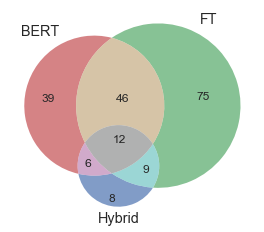

In [157]:

fig = venn3(
        subsets=(len(set_100), len(set_010), len(set_110), len(set_001), len(set_101), len(set_011), len(set_111)),
        set_labels=('BERT', 'FT', 'Hybrid'), alpha = 0.7)
plt.savefig('./venn_3.pdf')

In [145]:
set_001

{6, 28, 69, 166, 220, 230, 232, 310}

In [6]:
hybrid_improve_bert_idx = [i for i in bert_fail_idx if i not in hybrid_fail_idx]
hybrid_improve_ft_idx = [i for i in ft_fail_idx if i not in hybrid_fail_idx]

hybrid_improve_bert_df = sis_df.iloc[hybrid_improve_bert_idx]
hybrid_improve_ft_df = sis_df.iloc[hybrid_improve_ft_idx]

In [7]:
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 100)

In [11]:
hybrid_improve_ft_df = hybrid_improve_ft_df[['predicate', 'sentence', 'sentence average score', 'ft prediction', 'hybrid prediction']]
hybrid_improve_bert_df = hybrid_improve_bert_df[['predicate', 'sentence', 'sentence average score', 'bert tuned prediction', 'hybrid prediction']]

In [14]:
hybrid_improve_bert_df['improvement'] = abs(hybrid_improve_bert_df['sentence average score'] - hybrid_improve_bert_df['bert tuned prediction']) - abs(hybrid_improve_bert_df['sentence average score'] - hybrid_improve_bert_df['hybrid prediction'])


hybrid_improve_ft_df['improvement'] = abs(hybrid_improve_ft_df['sentence average score'] - hybrid_improve_ft_df['ft prediction']) - abs(hybrid_improve_ft_df['sentence average score'] - hybrid_improve_ft_df['ft prediction'])




In [16]:
hybrid_improve_bert_df.sort_values(by=['improvement'], ascending=False)

,predicate,sentence,sentence average score,bert tuned prediction,hybrid prediction,improvement
16,match,IFC can match those seeking funds with those looking to invest funds into worthy projects.,1.285714,3.710361,1.399712,2.310649
376,applaud,I applauded my best friend and she applauded me too.,1.285714,4.055715,1.760545,2.295169
315,chase,MPs and government officials from Badakhshan chased and chased but found nothing.,1.000000,3.517569,1.325473,2.192096
234,hit,My abuser hit me and then I hit him back.,4.571429,2.417327,4.478094,2.060767
60,combine,People should combine their talent with a focus on delivering results.,1.571429,3.447616,1.568652,1.873411
12,match,Your file might match another author's file name.,1.000000,3.780439,1.918441,1.861999
78,compare,You can also compare your beauty with your boyfriend's or girlfriend's.,1.285714,3.191841,1.367342,1.824499
247,follow,Extremely violent upheaval and harsh words may follow.,1.000000,3.503393,1.946193,1.557200
341,bounce,Her long black hair and boobs bounced as she walked.,1.000000,2.543437,1.076225,1.467211
180,clash,His approach might clash with the wishes of some Vermonters.,2.000000,3.557798,2.101169,1.456629


In [117]:
sis_ft_df = pd.read_csv('./data/sis_with_features.csv', encoding='latin1')
# ft_names = list(sis_ft_df)[6:]

In [118]:
ft_names = ['direction', 'ani_match', 'sing_obj', 'rcp_phrase',  'conj_sub']

In [119]:
sis_df = pd.read_csv('./data/sis.csv')
config2human = {}
config2pred = {}
for index, row in sis_ft_df.iterrows():
    feature_config = ' '.join([str(row[ft_name]) for ft_name in ft_names])
    if feature_config not in config2human:
        config2human[feature_config] = [sis_df['sentence average score'][index]]
        config2pred[feature_config] = sis_df['ft prediction'][index]
    else:
        config2human[feature_config].append(sis_df['sentence average score'][index]) 
        

In [120]:
len(configs)

16

In [126]:
configs = list(config2human.keys())  
stds = []
diffs = []

for config in configs:
    v = config2human[config]
    stds.append(np.std(np.array(v)))
    diffs.append(abs(np.array(v).mean() - config2pred[config]))

In [127]:
[stds[i] for i in np.argsort(np.array(diffs))[:10]]

[0.0,
 0.3976974544814443,
 0.14285714299999996,
 0.7739926523627758,
 1.4014829820472845,
 0.08979133738332117,
 0.6615433780958285,
 1.4615069596441599,
 0.0,
 1.3504345483855176]

In [128]:
np.argsort(np.array(stds))[:10]

array([ 5, 10, 13, 14, 15,  8,  7,  6,  4,  1])

In [129]:
np.argsort(np.array(diffs))[:10]

array([13,  6,  7,  3,  2,  8,  1,  0, 14, 11])

In [113]:
for i in range(len(stds)):
    if stds[i] == 0.0:
        stds[i] = 100
np.argsort(np.array(stds))[:10]

array([ 8,  7,  6,  4,  1,  3, 11,  9,  2,  0])

In [114]:
np.sort(np.array(stds))

array([8.97913374e-02, 1.42857143e-01, 3.97697454e-01, 5.42959585e-01,
       6.61543378e-01, 7.73992652e-01, 1.35043455e+00, 1.38975846e+00,
       1.40148298e+00, 1.46150696e+00, 1.64130361e+00, 1.00000000e+02,
       1.00000000e+02, 1.00000000e+02, 1.00000000e+02, 1.00000000e+02])

In [123]:
good_config_idx

array([13,  6,  7,  3,  2,  8,  1,  0, 14, 11])

In [131]:
good_config_idx = np.argsort(np.array(diffs))[:]
good_config_idx = [i for i in good_config_idx if i in np.argsort(np.array(stds))[:11]]
good_configs = [configs[i] for i in good_config_idx]
for config in good_configs:
    print(len(config2human[config]))

1
8
2
12
9
99
1
1
1
47
2


In [ ]:
stds[]

In [132]:
good_configs

['1 0 0 0 1',
 '0 0 0 1 1',
 '0 1 1 0 1',
 '1 1 0 0 1',
 '1 1 1 0 1',
 '0 1 0 0 1',
 '0 1 1 1 1',
 '0 1 0 0 0',
 '0 0 1 1 1',
 '0 1 0 1 1',
 '0 1 0 1 0']

In [102]:
ft_names

['direction', 'ani_match', 'sing_obj', 'rcp_phrase', 'conj_sub']

In [133]:

good_sent_idx = []
config_idx = []
for index, row in sis_ft_df.iterrows():
    feature_config = ' '.join([str(row[ft_name]) for ft_name in ft_names])
    if any(feature_config in s for s in good_configs):
        if abs(sis_df['sentence average score'][index] - sis_df['ft prediction'][index]) <= 1:
            k = good_configs.index(feature_config)
            good_sent_idx.append(index)
            config_idx.append(k)

In [134]:
config_idx

[5,
 3,
 9,
 8,
 1,
 2,
 4,
 5,
 5,
 7,
 9,
 1,
 9,
 9,
 9,
 5,
 5,
 5,
 5,
 9,
 1,
 9,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 0,
 9,
 5,
 5,
 1,
 9,
 5,
 5,
 5,
 5,
 9,
 5,
 5,
 5,
 5,
 3,
 9,
 9,
 5,
 5,
 4,
 9,
 9,
 4,
 4,
 5,
 9,
 3,
 5,
 5,
 9,
 4,
 3,
 9,
 5,
 5,
 5,
 9,
 6,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 2,
 5,
 1,
 5,
 5,
 3,
 5,
 9,
 5,
 5,
 5,
 5,
 5,
 9,
 5,
 9,
 5,
 5,
 1,
 5,
 9,
 5,
 5,
 9,
 9,
 9,
 9,
 5,
 9,
 4,
 9,
 9,
 3,
 1,
 9,
 5,
 9,
 4,
 5,
 4,
 9,
 5,
 5,
 5,
 3,
 9,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 9,
 5,
 5,
 9,
 5,
 5,
 5,
 5,
 5,
 9,
 5,
 1,
 9,
 5,
 9,
 5,
 9,
 5,
 5,
 9,
 5,
 5,
 9,
 9,
 5,
 9,
 5,
 9,
 9,
 5]

In [83]:
pd.Series(config_idx)

0     4
1     2
2     4
3     4
4     3
5     2
6     3
7     4
8     2
9     4
10    0
11    1
12    0
13    1
14    0
dtype: int64

In [135]:
system_df = sis_df.iloc[good_sent_idx].copy(deep=True)  # 15 examples
system_df['ft config index'] = pd.Series(config_idx)
# # system_df[['predicate', 'sentence', 'sentence average score', 'ft prediction', 'ft config index']]
# system_df

In [136]:
mse_ft = np.square(np.array(list(system_df['sentence average score'])) - np.array(list(system_df['ft prediction']))).mean()
mse_bert = np.square(np.array(list(system_df['sentence average score'])) - np.array(list(system_df['bert prediction']))).mean()
mse_bert_tuned = np.square(np.array(list(system_df['sentence average score'])) - np.array(list(system_df['bert tuned prediction']))).mean()
mse_hybrid = np.square(np.array(list(system_df['sentence average score'])) - np.array(list(system_df['hybrid prediction']))).mean()

In [137]:
print(mse_ft)
print(mse_bert)
print(mse_bert_tuned)
print(mse_hybrid)

0.1895869925283811
1.4960774585761247
0.4511706219205786
0.12872479283783067


In [142]:
from scipy.stats import pearsonr

print(pearsonr(np.array(list(system_df['sentence average score'])), np.array(list(system_df['ft prediction']))))
print(pearsonr(np.array(list(system_df['sentence average score'])), np.array(list(system_df['bert prediction']))))
print(pearsonr(np.array(list(system_df['sentence average score'])), np.array(list(system_df['bert tuned prediction']))))
print(pearsonr(np.array(list(system_df['sentence average score'])), np.array(list(system_df['hybrid prediction']))))

(0.12453495465597944, 0.10461389828989157)
(0.16412366978443066, 0.031951162987557395)
(0.3154385045176883, 2.6405789641414026e-05)
(0.40370551054990483, 4.36872840820673e-08)


In [143]:
system_df

,pred_id,predicate,sentence,sentence_rev,verb symmetry score,is_pred_symmetry,votes for 1,votes for 2,votes for 3,votes for 4,votes for 5,sentence average score,bert prediction,bert tuned prediction,ft prediction,w2v prediction,glv prediction,hybrid prediction,ft config index
1,1,marry,Hannah Tamaki and Bishop Brian have been married for over 26 years.,Bishop Brian and Hannah Tamaki have been married for over 26 years.,4.00,1,7,0,0,0,0,1.000000,1.380997,1.570786,0.912360,1.843940,1.682539,1.101811,3.0
3,1,marry,Angelina and Brad were married several years ago and had some issues.,Brad and Angelina were married several years ago and had some issues.,4.00,1,7,0,0,0,0,1.000000,1.452158,1.269617,1.159367,1.919101,1.621316,1.081548,8.0
5,1,marry,Croats and Serbs should marry each other.,Serbs and Croats should marry each other.,4.00,1,7,0,0,0,0,1.000000,1.287725,0.375314,0.626587,1.926236,1.790368,1.026223,2.0
7,1,marry,Delany and the poet Marilyn Hacker were married to each other for several years and have a daugh...,The poet Marilyn Hacker and Delany were married to each other for several years and have a daugh...,4.00,1,7,0,0,0,0,1.000000,1.298645,1.496085,1.533970,1.907645,1.775933,1.076090,5.0
9,1,marry,Prince William and Kate Middleton married each other.,Kate Middleton and Prince William married each other.,4.00,1,7,0,0,0,0,1.000000,2.337420,0.872221,0.994234,1.875089,1.706438,1.055950,7.0
11,2,match,"If the laboratory results and the patient's clinical presentation do not match, a decision to tr...","If the patient's clinical presentation and the laboratory results do not match, a decision to tr...",4.33,1,7,0,0,0,0,1.000000,1.558510,1.388085,1.430217,2.294916,2.154104,1.144568,1.0
13,2,match,"Rogen and Heigl seemed evenly matched as comedians, though Heigl may have edged him out in the e...","Heigl and Rogen seemed evenly matched as comedians, though Heigl may have edged him out in the e...",4.33,1,7,0,0,0,0,1.000000,1.819250,1.091705,1.359714,1.963393,2.000945,1.158078,9.0
15,2,match,Felon names and their dates of birth matched.,Their dates of birth and felon names matched.,4.33,1,6,1,0,0,0,1.142857,2.249732,0.538812,0.976963,1.934336,1.817089,1.164375,5.0
17,2,match,The file contents and your results do not match.,Your results and the file contents do not match.,4.33,1,7,0,0,0,0,1.000000,0.254294,0.642317,1.099425,2.206120,2.293441,1.137255,5.0
19,2,match,The pair with the best correlation matched in significance.,The pair with the best correlation matched in significance.,4.33,1,6,0,0,0,1,1.571429,2.118394,2.025090,2.099980,2.224036,2.140949,1.172977,9.0


In [7]:
import seaborn as sns; sns.set()
import numpy as np
from matplotlib import pyplot as plt

In [8]:
sent1 = 'The woman and the real Saint Nicholas resembled each other'.split()
sent2 = 'USSR and USA argue with each other'.split()

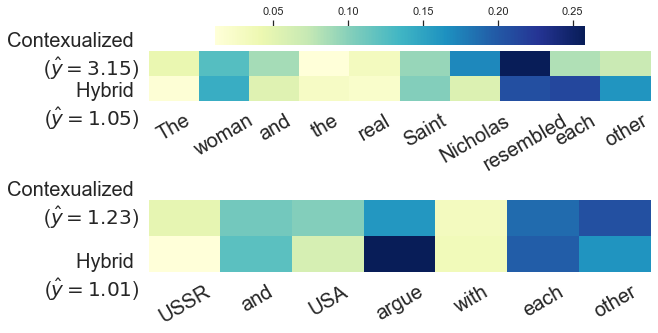

In [50]:
from scipy.special import softmax

attn_weights_1c = np.array([.7, 2., 1.4, .14, .5, 1.5, 2.74, 4.58, 1.33, 1.12])
attn_weights_1h = np.array([.23, 2.3, 0.87, .44, .35, 1.65, 0.9, 3.35, 3.45, 2.62])
attn_weights_1c = attn_weights_1c / np.sum(attn_weights_1c)
attn_weights_1h = attn_weights_1h / np.sum(attn_weights_1h)
attn_weights_1 = np.vstack([attn_weights_1c, attn_weights_1h])
y_labels_1 = ['Contexualized \n ($\hat{y}=3.15$)', 'Hybrid \n($\hat{y}=1.05$)']

attn_weights_2c = np.array([.7, 1.5, 1.4, 2.14, .5, 2.5, 2.74])
attn_weights_2h = np.array([.23, 1.67, 0.87, 3.44, .55, 2.65, 2.2])
attn_weights_2c = attn_weights_2c / np.sum(attn_weights_2c)
attn_weights_2h = attn_weights_2h / np.sum(attn_weights_2h)
attn_weights_2 = np.vstack([attn_weights_2c, attn_weights_2h])
y_labels_2 = ['Contexualized \n ($\hat{y}=1.23$)', 'Hybrid \n($\hat{y}=1.01$)']




fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(9,5))
hmp_1 = sns.heatmap(attn_weights_1, xticklabels=sent1, yticklabels=y_labels_1, robust=True,
            square=True,  cmap="YlGnBu", ax=ax1, cbar_kws = dict(use_gridspec=False,location="top"))
hmp_1.set_xticklabels(hmp_1.get_xmajorticklabels(), fontsize = 20, rotation=30)
hmp_1.set_yticklabels(hmp_1.get_ymajorticklabels(), fontsize = 20)

hmp_2 = sns.heatmap(attn_weights_2, xticklabels=sent2, yticklabels=y_labels_2, 
            square=True,  cbar=False, cmap="YlGnBu", ax=ax2, cbar_kws = dict(use_gridspec=False,location="top"))
hmp_2.set_xticklabels(hmp_2.get_xmajorticklabels(), fontsize = 20, rotation=30)
hmp_2.set_yticklabels(hmp_2.get_ymajorticklabels(), fontsize = 20)


plt.savefig('./attention_weights.pdf', bbox_inches = 'tight')